In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

In [2]:
# Formato colores, mas opciones ver print(plt.style.available)
plt.style.use('fivethirtyeight')
# Tamaño grafos
figsize = (15,7)
# Tamaño letras
SIZE = 16
plt.rc('xtick', labelsize=SIZE)
plt.rc('ytick', labelsize=SIZE)
plt.rc('axes', titlesize=SIZE)

In [3]:
# Leer los datos desde archivo separado por comas
Yauyos = pd.read_csv('Precip_Est_Yauyos.csv', index_col=0, parse_dates=True)
# Toma datos mayores que cero
Yauyos_ = Yauyos[Yauyos>0].rename(columns={'Ppt':'Ppt>0'})

In [4]:
# Describe series de tiempo
pd.concat([Yauyos.describe(), Yauyos_.describe()], axis=1)

,Ppt,Ppt>0
count,15937.000000,7207.000000
mean,2.527747,5.589663
std,4.346443,4.965991
min,0.000000,0.100000
25%,0.000000,2.000000
50%,0.000000,4.200000
75%,3.900000,7.900000
max,49.500000,49.500000


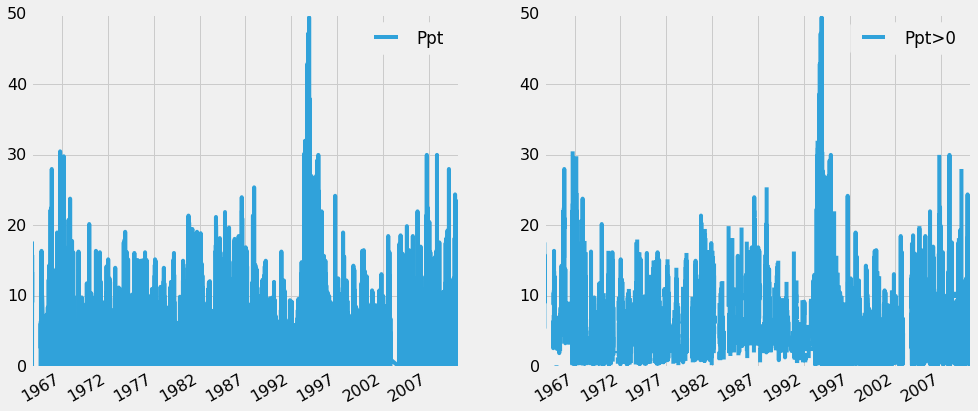

In [15]:
# Grafico de serie de tiempo
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
Yauyos.plot(ax=axs[0])
Yauyos_.plot(ax=axs[1])

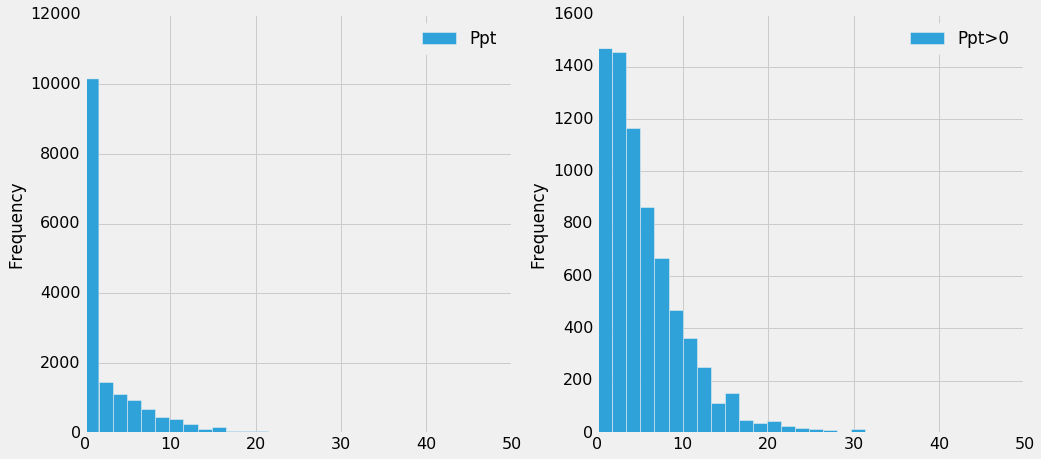

In [6]:
# Histograma
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
Yauyos.plot.hist(bins=30, ax=axs[0])
Yauyos_.plot.hist(bins=30, ax=axs[1])

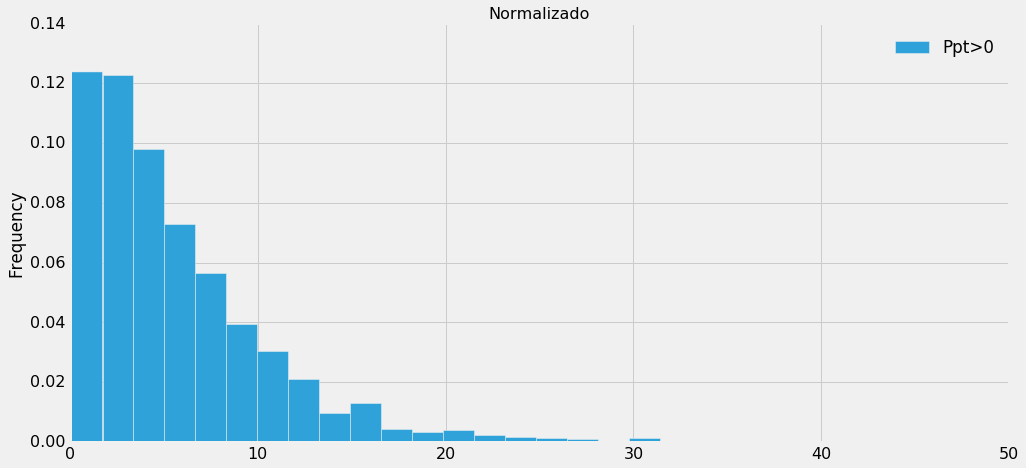

In [7]:
# Histograma Normalizado
Yauyos_.plot.hist(bins=30, normed=True, title='Normalizado', figsize=figsize)

In [8]:
# Calculo del promedio y la desviación
promedio = Yauyos_.mean().values
desviacion = Yauyos_.std().values
print 'Promedio: %f \n Desviacion: %f' % (promedio, desviacion)

Promedio: 5.589663 
 Desviacion: 4.965991


In [9]:
# Generar regresiones estadisticas (probability density function)
tabulaciones = np.arange(-40,51,0.1)
kwargs = dict(loc=promedio, scale=desviacion)
distnormal = stats.norm.pdf(tabulaciones, **kwargs)
kwargs = dict(skew=1, loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones, **kwargs)
kwargs = dict(c=1, loc=promedio, scale=desviacion)
distweibull = stats.dweibull.pdf(tabulaciones, **kwargs)
kwargs = dict(df=2, loc=promedio, scale=desviacion)
distchi2 = stats.chi2.pdf(tabulaciones, **kwargs)

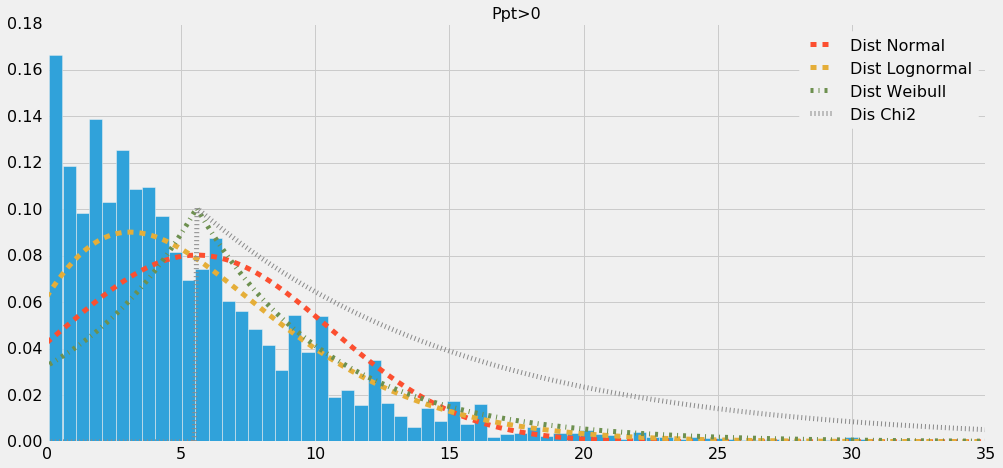

In [10]:
# Comparamos histograma de los datos y regresiones
fig, ax = plt.subplots(figsize=figsize)
Yauyos_.hist(bins=100, normed=True, ax=ax)
plt.plot(tabulaciones, distnormal, linewidth=5, linestyle='--',label='Dist Normal')
plt.plot(tabulaciones, distlognormal, linewidth=5, linestyle='--', label='Dist Lognormal')
plt.plot(tabulaciones, distweibull, linewidth=5, linestyle='-.', label='Dist Weibull')
plt.plot(tabulaciones, distchi2, linewidth=5, linestyle=':', label='Dis Chi2')
plt.xlim(0,35)
plt.legend(loc='upper right', fontsize=SIZE)

### Calculamos las precipitaciones para periodos de retorno de 100 años

In [11]:
T = 100
Pbb = 1. / T
Pbb_c = 1. - Pbb

# Calculos de la inversa de la inversa de la función de distribución
p_norm = stats.norm.ppf([Pbb_c], loc=promedio, scale=desviacion)
p_lognorm = stats.pearson3.ppf([Pbb_c], skew=1, loc=promedio, scale=desviacion)
p_weibull = stats.dweibull.ppf([Pbb_c], c=1, loc=promedio, scale=desviacion)
p_chi2 = stats.chi2.ppf([Pbb_c], df=2, loc=promedio, scale=desviacion)

print "Probabilidad de no excedencia =", Pbb_c
print "Precipitación para T=%s[años] Dist Normal =" % T, float(p_norm)
print "Precipitación para T=%s[años] Dist Logormal =" % T, float(p_lognorm)
print "Precipitación para T=%s[años] Dist Weibull =" % T, float(p_weibull)
print "Precipitación para T=%s[años] Dist Chi2 =" % T, float(p_chi2)

Probabilidad de no excedencia = 0.99
Precipitación para T=100[años] Dist Normal = 17.1422845839
Precipitación para T=100[años] Dist Logormal = 20.5996613107
Precipitación para T=100[años] Dist Weibull = 25.0167324365
Precipitación para T=100[años] Dist Chi2 = 51.3281268598


### Calculamos las precipitaciones para periodos de retorno de 200 años

In [12]:
T = 200
Pbb = 1. / T
Pbb_c = 1. - Pbb

# Calculos de la inversa de la inversa de la función de distribución
p_norm = stats.norm.ppf([Pbb_c], loc=promedio, scale=desviacion)
p_lognorm = stats.pearson3.ppf([Pbb_c], skew=1, loc=promedio, scale=desviacion)
p_weibull = stats.dweibull.ppf([Pbb_c], c=1, loc=promedio, scale=desviacion)
p_chi2 = stats.chi2.ppf([Pbb_c], df=2, loc=promedio, scale=desviacion)

print "Probabilidad de no excedencia =", Pbb_c
print "Precipitación para T=%s[años] Dist Normal =" % T, float(p_norm)
print "Precipitación para T=%s[años] Dist Logormal =" % T, float(p_lognorm)
print "Precipitación para T=%s[años] Dist Weibull =" % T, float(p_weibull)
print "Precipitación para T=%s[años] Dist Chi2 =" % T, float(p_chi2)

Probabilidad de no excedencia = 0.995
Precipitación para T=200[años] Dist Normal = 18.3812070265
Precipitación para T=200[años] Dist Logormal = 22.9147067765
Precipitación para T=200[años] Dist Weibull = 28.4588948438
Precipitación para T=200[años] Dist Chi2 = 58.2124516744


### Calculamos las precipitaciones para periodos de retorno de 500 años

In [13]:
T = 500
Pbb = 1. / T
Pbb_c = 1. - Pbb

# Calculos de la inversa de la inversa de la función de distribución
p_norm = stats.norm.ppf([Pbb_c], loc=promedio, scale=desviacion)
p_lognorm = stats.pearson3.ppf([Pbb_c], skew=1, loc=promedio, scale=desviacion)
p_weibull = stats.dweibull.ppf([Pbb_c], c=1, loc=promedio, scale=desviacion)
p_chi2 = stats.chi2.ppf([Pbb_c], df=2, loc=promedio, scale=desviacion)

print "Probabilidad de no excedencia =", Pbb_c
print "Precipitación para T=%s[años] Dist Normal =" % T, float(p_norm)
print "Precipitación para T=%s[años] Dist Logormal =" % T, float(p_lognorm)
print "Precipitación para T=%s[años] Dist Weibull =" % T, float(p_weibull)
print "Precipitación para T=%s[años] Dist Chi2 =" % T, float(p_chi2)

Probabilidad de no excedencia = 0.998
Precipitación para T=500[años] Dist Normal = 19.88258707
Precipitación para T=500[años] Dist Logormal = 25.8907335423
Precipitación para T=500[años] Dist Weibull = 33.0091860372
Precipitación para T=500[años] Dist Chi2 = 67.3130340612


### Two-sample Kolmogorov-Smirnov Test

In [14]:
data = Yauyos_.dropna().values.ravel()
n = int(data.shape[0])
rvs_norm = stats.norm.rvs(size=n, loc=promedio, scale=desviacion)
rvs_lognorm = stats.pearson3.rvs(size=n, skew=1, loc=promedio, scale=desviacion)
rvs_weibull = stats.dweibull.rvs(size=n, c=1, loc=promedio, scale=desviacion)
rvs_chi2 = stats.chi2.rvs(size=n, df=2, loc=promedio, scale=desviacion)
print "Tamaño de la muestra = ", n
print "Test Hipotesis datos tienen una Dist Normal\n", stats.ks_2samp(data, rvs_norm)
print "\nTest Hipotesis datos tienen una Dist LogNormal\n", stats.ks_2samp(data, rvs_lognorm)
print "\nTest Hipotesis datos tienen una Dist Weibull\n", stats.ks_2samp(data, rvs_weibull)
print "\nTest Hipotesis datos tienen una Dist Chi2\n", stats.ks_2samp(data, rvs_chi2)

Tamaño de la muestra =  7207
Test Hipotesis datos tienen una Dist Normal
Ks_2sampResult(statistic=0.13500763146940475, pvalue=1.0453132489240611e-57)

Test Hipotesis datos tienen una Dist LogNormal
Ks_2sampResult(statistic=0.11710836686554739, pvalue=1.5892104089063134e-43)

Test Hipotesis datos tienen una Dist Weibull
Ks_2sampResult(statistic=0.16525600111003191, pvalue=2.9917059423710981e-86)

Test Hipotesis datos tienen una Dist Chi2
Ks_2sampResult(statistic=0.60649368669349246, pvalue=0.0)
